In [1]:
import os
import numpy as np
import pandas as pd
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from tqdm import tqdm
import matplotlib.pyplot as plt

from tess_asteroid_ml import *
from tess_asteroid_ml.make_TESS_asteroid_db import *

Sector 13 Camera 1
['https://archive.stsci.edu/missions/tess/ffi/s0013/2019/184/1-1/tess2019184035930-s0013-1-1-0146-s_ffic.fits', 'https://archive.stsci.edu/missions/tess/ffi/s0013/2019/184/1-2/tess2019184035930-s0013-1-2-0146-s_ffic.fits', 'https://archive.stsci.edu/missions/tess/ffi/s0013/2019/184/1-3/tess2019184035930-s0013-1-3-0146-s_ffic.fits', 'https://archive.stsci.edu/missions/tess/ffi/s0013/2019/184/1-4/tess2019184035930-s0013-1-4-0146-s_ffic.fits']


Set MJD-END to 58667.192422 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58667.192414 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58667.192805 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58667.192814 from DATE-END'. [astropy.wcs.wcs]


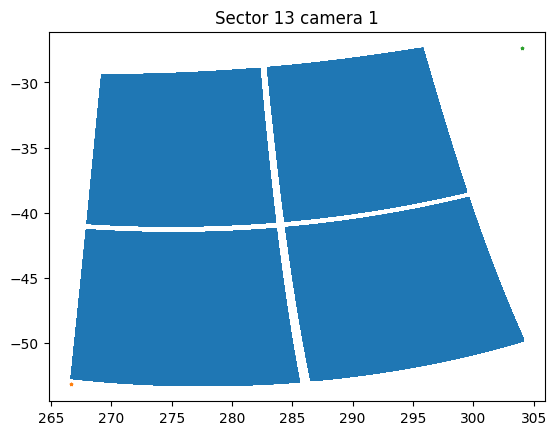

<SkyCoord (ICRS): (ra, dec) in deg
    (266.68071143, -53.19205097)> <SkyCoord (ICRS): (ra, dec) in deg
    (304.0630593, -27.39807427)> 2458653.9163194443 30 False
Requesting JPL Smal-bodies API
<SkyCoord (ICRS): (ra, dec) in deg
    (266.68071143, -53.19205097)> <SkyCoord (ICRS): (ra, dec) in deg
    (304.0630593, -27.39807427)> 2458661.0256915507 30 False
Requesting JPL Smal-bodies API


KeyboardInterrupt: 

In [2]:
ccd = 0
provider = "mast"

for sector in range(13, 14):
    for camera in range(1, 5):

        print(f"Sector {sector} Camera {camera}")
        # get FFI file path
        try:
            ffi_file = get_FFI_name(sector=sector, camera=camera, ccd=ccd, provider=provider, correct=0)
            print(ffi_file)
            # read FFI to get time, WCS and header
            ffi_header, f2d, col_2d, row_2d, ra_2d, dec_2d = get_data_from_files(
                ffi_file, provider=provider
            )
        except:dd
            ffi_file = get_FFI_name(sector=sector, camera=camera, ccd=ccd, provider=provider, correct=1)
            print(ffi_file)
            # read FFI to get time, WCS and header
            ffi_header, f2d, col_2d, row_2d, ra_2d, dec_2d = get_data_from_files(
                ffi_file, provider=provider
            )
        
        ffi_date = get_sector_dates(sector=sector)

        # get asteroid table from JPL SBI for Sector/Camera/CCD
        edge1 = SkyCoord(np.min(ra_2d) * u.deg, 
                 np.min(dec_2d) * u.deg, 
                 frame='icrs')
        edge2 = SkyCoord(np.max(ra_2d) * u.deg, 
                         np.max(dec_2d) * u.deg, 
                         frame='icrs')
        # if sector raps around ra 360/0 edge find the right sector edges
        if np.abs(edge1.ra - edge2.ra) > 180 * u.deg and np.max(np.abs(dec_2d)) < 87:
            ra_2d = np.array(ra_2d)
            edge1 = SkyCoord(np.min(ra_2d[ra_2d >180]) * u.deg, 
                 np.min(dec_2d) * u.deg, 
                 frame='icrs')
            edge2 = SkyCoord(np.max(ra_2d[ra_2d < 180]) * u.deg, 
                             np.max(dec_2d) * u.deg, 
                             frame='icrs')
        plt.scatter(ra_2d, dec_2d, s=1)
        plt.scatter(edge1.ra, edge1.dec, marker="*", s=4)
        plt.scatter(edge2.ra, edge2.dec, marker="*", s=4)
        plt.title(f"Sector {sector} camera {camera}")
        plt.show()
        try:
            jpl_df = get_asteroid_table(
                edge1, 
                edge2, 
                sector=sector, 
                camera=camera, 
                ccd=ccd, 
                # date_obs=ffi_date.mean().jd, 
                # date_obs=ffi_date.jd.min(), 
                date_obs=np.linspace(ffi_date.jd.min(), ffi_date.jd.max(), 5), 
                force=True, 
                elem=False,
            )
        except ValueError:
            print("This sector/camera had empty JPL result. NEED to CHECK...")
            break
            # continue
        print("======" * 10)
        break
    break

# Special case

In [82]:
sector = 24
camera = 4
provider = "mast"


print(f"Sector {sector} Camera {camera}")
# get FFI file path
ffi_file = get_FFI_name(sector=sector, camera=camera, ccd=ccd, provider=provider)
print(ffi_file)

# read FFI to get time, WCS and header
ffi_header, f2d, col_2d, row_2d, ra_2d, dec_2d = get_data_from_files(
    ffi_file, provider=provider
)
ffi_date = Time([ffi_header[0]["DATE-OBS"], ffi_header[0]["DATE-END"]])

ra_2d = np.array(ra_2d)
dec_2d = np.array(dec_2d)

Sector 24 Camera 4
['https://archive.stsci.edu/missions/tess/ffi/s0024/2020/120/4-1/tess2020120235919-s0024-4-1-0180-s_ffic.fits', 'https://archive.stsci.edu/missions/tess/ffi/s0024/2020/120/4-2/tess2020120235919-s0024-4-2-0180-s_ffic.fits', 'https://archive.stsci.edu/missions/tess/ffi/s0024/2020/120/4-3/tess2020120235919-s0024-4-3-0180-s_ffic.fits', 'https://archive.stsci.edu/missions/tess/ffi/s0024/2020/120/4-4/tess2020120235919-s0024-4-4-0180-s_ffic.fits']


Set MJD-END to 58969.017932 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58969.017930 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58969.016846 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58969.016849 from DATE-END'. [astropy.wcs.wcs]


In [83]:
# get asteroid table from JPL SBI for Sector/Camera/CCD
edge1 = SkyCoord(np.min(ra_2d[ra_2d >180]) * u.deg, 
                 np.min(dec_2d) * u.deg, 
                 frame='icrs')
edge2 = SkyCoord(np.max(ra_2d[ra_2d < 180]) * u.deg, 
                 np.max(dec_2d) * u.deg, 
                 frame='icrs')

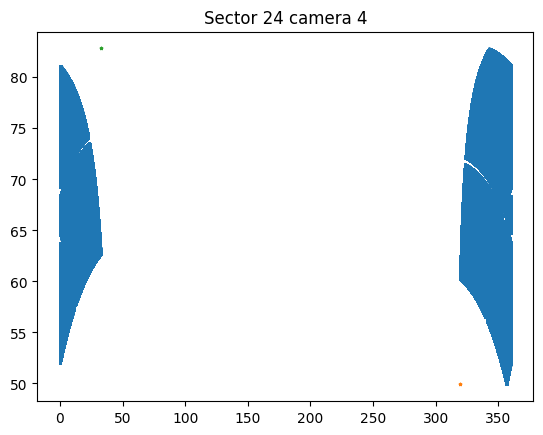

In [84]:
plt.scatter(ra_2d, dec_2d, s=1)
plt.scatter(edge1.ra, edge1.dec, marker="*", s=4)
plt.scatter(edge2.ra, edge2.dec, marker="*", s=4)
plt.title(f"Sector {sector} camera {camera}")
plt.show()

In [85]:
try:
    jpl_df = get_asteroid_table(
        edge1, edge2, sector=sector, camera=camera, ccd=ccd, date_obs=ffi_date.mean().jd, force=True
    )
except ValueError:
    print("This sector/camera had empty JPL result. NEED to CHECK...")

Requesting JPL Smal-bodies API
Saving to /Users/jorgemarpa/Work/BAERI/ADAP/tess-asteroid-ml/data/jpl/jpl_small_bodies_tess_s0024-4-0_catalog.csv
JPL SBI found 158 asteroids with V < 30 in s0024-4-0


# Compare old DB vs New with 5 times query

In [11]:
os.path.dirname(PACKAGEDIR)

'/Users/jorgemarpa/Work/BAERI/ADAP/tess-asteroid-ml'

In [17]:
db_old = pd.read_csv(f"{os.path.dirname(PACKAGEDIR)}/data/jpl/bkp/jpl_small_bodies_tess_s0002-1-0_catalog.csv")
db_new = pd.read_csv(f"{os.path.dirname(PACKAGEDIR)}/data/jpl/jpl_small_bodies_tess_s0002-1-0_catalog.csv")

db_old.shape, db_new.shape

((29588, 15), (38135, 15))

In [18]:
db_old.head()

,Unnamed: 0,Object name,Astrometric RA (hh:mm:ss),"Astrometric Dec (dd mm'ss"")","Dist. from center RA ("")","Dist. from center Dec ("")","Dist. from center Norm ("")",Visual magnitude (V),"RA rate (""/h)","Dec rate (""/h)",ra,dec,V_mag,name,id
0,0,27 Euterpe (A853 VA),22:57:17.26,-09:25:58.7,-30000.0,50000.0,57000.0,9.98,-37.23,-13.970,344.321917,-9.432972,9.98,27 Euterpe,A853 VA
1,1,28 Bellona (A854 EA),22:51:30.46,-11:54:48.7,-30000.0,40000.0,52000.0,11.6,-29.14,-16.330,342.876917,-11.913528,11.60,28 Bellona,A854 EA
2,2,37 Fides (A855 TB),22:26:45.60,-12:15:41.3,-50000.0,40000.0,67000.0,10.8,-33.31,-7.776,336.690000,-12.261472,10.80,37 Fides,A855 TB
3,3,127 Johanna (A872 VB),00:04:09.66,-07:51:52.8,30000.0,50000.0,61000.0,12.6,-32.55,-8.584,1.040250,-7.864667,12.60,127 Johanna,A872 VB
4,4,173 Ino (A877 PA),00:04:42.46,-11:13:14.9,30000.0,40000.0,51000.0,10.7,-23.00,-32.290,1.176917,-11.220806,10.70,173 Ino,A877 PA


In [19]:
db_old.query("V_mag <= 22.0").shape, db_new.query("V_mag <= 22.0").shape

((24692, 15), (30935, 15))

# SBIdent and Comets

In [6]:
np.linspace(ffi_date.jd.min(), ffi_date.jd.max(), 5)

array([2458653.91631944, 2458661.02569155, 2458668.13506366,
       2458675.24443576, 2458682.35380787])

In [7]:
obstime = 2458653.91631944

# 1AU in km
au = (1 * u.au).to(u.km).value
# TESS state vector
tess = Horizons(id="-95", location="500", epochs=obstime, id_type=None).vectors(
    refplane="earth"
)
tess_km = (
    tess[["x", "y", "z", "vx", "vy", "vz"]].to_pandas().to_numpy() * au
)  # convert to km/d
tess_km[:, 3:] = tess_km[:, 3:] / 86400  # convert to km/s
tess_km = tess_km[0]  # take the first row

# form the xobs dictionary that is the input for SBIdent location argument
xobs = ",".join([np.format_float_scientific(s, precision=5) for s in tess_km])
xobs_location = {"xobs": xobs}

sbid3 = SBIdent(
    location=xobs_location,
    obstime=obstime,
    fov=[edge1, edge2],
    maglim=maglim,
    precision="high",
    request=True,
    elem=elem,
    # filters={"sb-kind": "c"}
)
jpl_sb = sbid3.results.to_pandas()

ReadTimeout: HTTPSConnectionPool(host='ssd.jpl.nasa.gov', port=443): Read timed out. (read timeout=30)